# Eigenvalues, Eigenvectors, Principal Components, and Singular Values Computation

- **Course:** CS660/71425 Mathematical Foundations of Analytics
- **Instructor:** Prof. Sarbanes
- **Group-1:** Will Torres, Mike Griffin, Watson Blair, Syed Abdul Mubashir, Abdul Munaf Mohammed
- **Semester:** Fall 2024
- **Project #:** 2
- **Due Date:** 04-Nov-2024

## Project Description
The primary objectives of this project are to:
- Develop custom Python functions to compute Eigenvalues and Eigenvectors of a matrix.
- Implement a Principal Components Analysis (PCA) from scratch, following the standard steps involved in PCA computation.
- Create a function for Singular Value Decomposition (SVD), including the derivation of U, Σ, and V matrices.
- Compare the runtime performance of our custom implementations against Python’s built-in libraries, specifically NumPy and Scikit-learn.

Secondary objectives include
- Gain experience working with github.
- Explore how to make our workflow more efficient.
- Gain sensitivity for algorithmic efficiency of code produced.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from helpers.Process_Matrix.process_matrix import BenchmarkUtility

## Analysis

In [ ]:
# Define sample sizes for analysis
matrix_sizes = [10, 25, 50, 75, 100, 250, 400]
data_list = [np.random.rand(n, n) for n in matrix_sizes]
labels = [f'{n}x{n}' for n in matrix_sizes]

# Iterate through each data matrix in data_list
processor = BenchmarkUtility(labels=labels)
processor.batch_benchmark(data_list)

In [ ]:
print("\nAll Execution Times:")
for key, times in processor.execution_times.items():
    print(f"{key}: {times}")


All Execution Times:
manual_eig: [0.09288597106933594, 0.30756711959838867, 1.7647819519042969, 5.160086154937744, 10.32213807106018, 36.33778119087219]
sklearn_eig: [0.0003559589385986328, 0.0009522438049316406, 0.00049591064453125, 0.01931476593017578, 0.014293909072875977, 0.15226078033447266]
manual_pca: [0.03378796577453613, 0.12560701370239258, 1.4328551292419434, 3.953001022338867, 7.806736946105957, 11.4550039768219]
sklearn_pca: [0.0019218921661376953, 0.001967191696166992, 0.0016100406646728516, 0.008194923400878906, 0.013616800308227539, 0.29505109786987305]
manual_svd: [0.09510087966918945, 0.9831607341766357, 5.315365791320801, 16.725820779800415, 14.908432722091675, 46.67828416824341]
sklearn_svd: [5.0067901611328125e-05, 0.00038695335388183594, 0.005357027053833008, 0.035176992416381836, 0.018080949783325195, 0.024063825607299805]


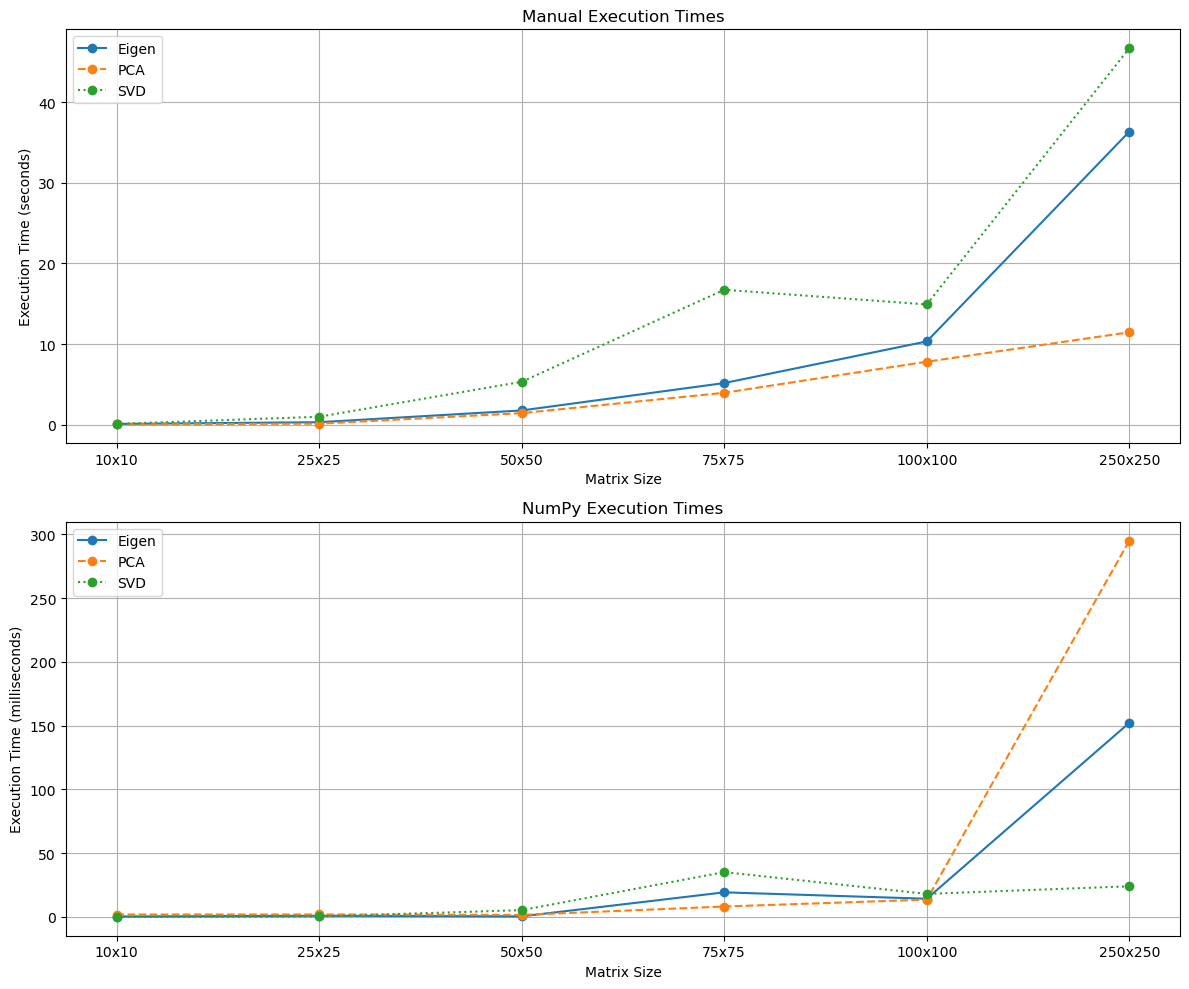

In [ ]:
processor.plot_execution_times() 

# Findings and Impressions

- NumPy utilities are far more efficient than any code we wrote.
- NumPy Eigen and SVD functions are sensitive to matrix size to reduce execution time for matrices larger than 250 x 250, and most likely adjust how these values are derived to ensure efficient computation.


# Benchmarking Process
-A dedicated timer function tracks the execution time of each method (PCA, Eigen, SVD). This function receives the computation method and its parameters.

-Using a ThreadPoolExecutor to manage sequential execution reduced manual processing time from 3 minutes 45 seconds to 2 minutes 17 seconds. With sklearn, execution times dropped to under a second as compared to 1.4 seconds in earlier iterations.

## SVD Process
As we approached Singular Value Decomposition, our primary focus was to maximize transparency in the process. Singular Value is not in and of itself a complicated process, but making sure that each step of the calculation is distinct, allowing for any errors to be quickly and efficiently identified, was essential.
We did use array-based numpy helpers to create transposes and copy matrices, but utilized a standard ‘for’ loop to build the Singular Value Array.
After initially nesting ‘for’ loops that applied to both the U and V matrix, I found that an error was being thrown once the matrices had to be multiplied together; I made the decision to create separate iterative functions for U and V, allowing them to be calculated separately from one another.
I have found that the numpy .svd helper function only provides the three matrices, while my function calculates the singular functions directly.

# PCA Implementation Process

- Created mean, std, standardize_data, and covariance functions that replicate core NumPy operations to standardize the data for PCA.

- Challenges: Ensuring accuracy without the precision optimizations in NumPy was a main hurdle. Balancing execution speed with accuracy required iterative testing, especially since some operations like covariance involve nested loops.